# `torchaudio` overview

## Reference

- [audio_preprocessing_tutorial](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/audio_preprocessing_tutorial.ipynb)

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

## Load data

Shape waveform: torch.Size([1, 667920])
Sample rate waveform: 22050


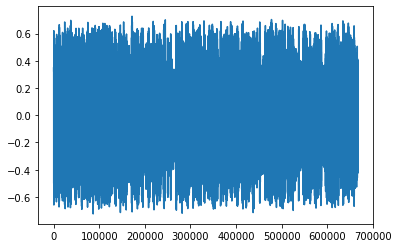

In [4]:
waveform, sample_rate = torchaudio.load('../datasets/genres/disco/disco.00005.wav')
print("Shape waveform: {}".format(waveform.size()))
print("Sample rate waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

## Transformation

Shape spectogram: torch.Size([1, 201, 3340])


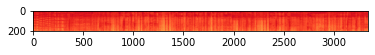

In [14]:
# spectogram
spctgrm = torchaudio.transforms.Spectrogram()(waveform)
print("Shape spectogram: {}".format(spctgrm.size()))

plt.figure()
plt.imshow(spctgrm.log2()[0, :, :].numpy(), cmap='YlOrRd')

Shape mel-spectogram: torch.Size([1, 128, 3340])


/Users/wyseo/.pyenv/versions/3.8.6/envs/general/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


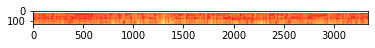

In [15]:
# mel-spectogram
mel_spctgrm = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape mel-spectogram: {}".format(mel_spctgrm.size()))
plt.figure()
p = plt.imshow(mel_spctgrm.log2()[0, :, :].numpy(), cmap='YlOrRd')

Shape transformed waveform: torch.Size([1, 66792])


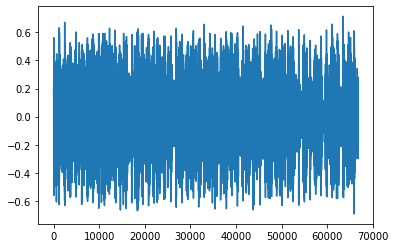

In [16]:
# resampling

new_sample_rate = sample_rate/10
channel = 0 # Resampling applies to a single channel, we resample first channel here
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

In [18]:
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -0.724578857421875
Max of waveform: 0.726715087890625
Mean of waveform: -0.0014169570058584213


In [21]:
# normalization
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()


waveform = normalize(waveform)
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -0.9931740760803223
Max of waveform: 1.0
Mean of waveform: -1.6105889955042585e-09


Shape of transformed waveform: torch.Size([1, 667920])
Shape of recovered waveform: torch.Size([1, 667920])


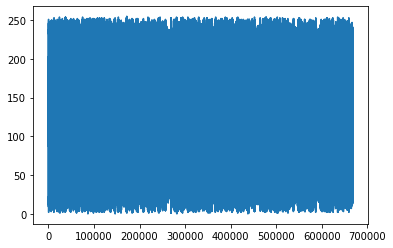

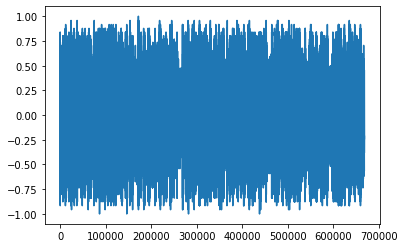

In [24]:
# encoding & decoding

## encoding
transformed = torchaudio.transforms.MuLawEncoding()(waveform)
print("Shape of transformed waveform: {}".format(transformed.size()))
plt.figure()
plt.plot(transformed[0,:].numpy())

## decoding
reconstructed = torchaudio.transforms.MuLawDecoding()(transformed)
print("Shape of recovered waveform: {}".format(reconstructed.size()))
plt.figure()
plt.plot(reconstructed[0,:].numpy())

In [25]:
# Compute median relative difference
err = ((waveform-reconstructed).abs() / waveform.abs()).median()
print("Median relative difference between original and MuLaw reconstucted signals: {:.2%}".format(err))

Median relative difference between original and MuLaw reconstucted signals: 1.15%
